 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

Скачаем обучающую и контрольную выборки.

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.1307,), (0.3081,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

#classes = (<перечислите классы как строки>)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
classes = trainset.classes
print(classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot|

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

### Анализ датасета

In [ ]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [ ]:
X_train = trainset.data
y_train = trainset.targets

X_test = testset.data
y_test = testset.targets

In [ ]:
print(y_test.shape)
print(y_train.shape)

torch.Size([10000])
torch.Size([60000])


In [ ]:
classes = y_train.unique()
print(classes)

def findUnique(y_sample):
  for classe in classes:
    k = 0
    for y in y_sample:
      if (y == classe):
        k+=1
    print(classe, " : ", k)

print("for train:")
findUnique(y_train)
print("for test:")
findUnique(y_test)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
for train:
tensor(0)  :  6000
tensor(1)  :  6000
tensor(2)  :  6000
tensor(3)  :  6000
tensor(4)  :  6000
tensor(5)  :  6000
tensor(6)  :  6000
tensor(7)  :  6000
tensor(8)  :  6000
tensor(9)  :  6000
for test:
tensor(0)  :  1000
tensor(1)  :  1000
tensor(2)  :  1000
tensor(3)  :  1000
tensor(4)  :  1000
tensor(5)  :  1000
tensor(6)  :  1000
tensor(7)  :  1000
tensor(8)  :  1000
tensor(9)  :  1000


Похоже, что для каждого класса в тестовой и тренировочной выборке одинаковое количество значений.

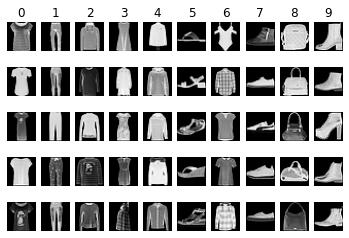

In [ ]:
N = 5
classes = list(range(0,10))
num_classes = len(classes)
for i, y in enumerate(classes):
  idxs = np.flatnonzero(y_train == y)
  idxs = np.random.choice(idxs, N, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * num_classes + y + 1
    plt.subplot(N, num_classes, plt_idx)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    if i == 0:
      plt.title(str(y))

Нормализуем данные

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
y_train = torch.eye(10)[y_train]

In [ ]:
y_test = torch.eye(10)[y_test]

In [ ]:
print(y_train.shape)
print(y_test.shape)

torch.Size([60000, 10])
torch.Size([10000, 10])


### MLP

Многослойная нейронная сеть MLP (Multi-Layer Perceptron) классифицирующая этот датасет

In [ ]:
# для удобства добавим сюда, чтобы изменять размер батча
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.1307,), (0.3081,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.metrics import classification_report

from tqdm.auto import tqdm

class NeuronMLP(nn.Module):
  def __init__(self, input_size=784, layer2=256, layer3=128, layer4=64, output_size=10):
    super(NeuronMLP, self).__init__()

    self.linear1 = nn.Linear(input_size, layer2)
    self.batch_norm1 = nn.BatchNorm1d(layer2)

    self.linear2 = nn.Linear(layer2, layer3)
    self.batch_norm2 = nn.BatchNorm1d(layer3)

    self.linear3 = nn.Linear(layer3, layer4)
    self.batch_norm3 = nn.BatchNorm1d(layer4)

    self.drop = nn.Dropout(0.1)

    self.linear4 = nn.Linear(layer4, output_size)
    self.batch_norm4 = nn.BatchNorm1d(output_size)

  def createMLP(self, optimizer, loss):
    self.optimizer = optimizer
    self.loss = loss

  def forward(self, X):
    X = self.linear1(X)
    X = F.relu(self.batch_norm1(X))
    X = self.drop(X)

    X = self.linear2(X)
    X = F.relu(self.batch_norm2(X))
    #X = self.drop(X)

    X = self.linear3(X)
    X = F.relu(self.batch_norm3(X))
    #X = self.drop(X)

    X = self.linear4(X)
    X = F.log_softmax(self.batch_norm4(X))
    return X

  def fit(self, train_loader, epochs):
    loss_values = []
    for epoch in tqdm(range(epochs)):
      for batch_indx, (data, targets) in enumerate(train_loader):
        data, targets = Variable(data.cuda()), Variable(targets.cuda())
        data = data.view(-1, 28*28)
        self.optimizer.zero_grad()
        net_out = self(data)
        loss = self.loss(net_out, targets)
        loss.backward()
        self.optimizer.step()
        if (batch_indx % 60 == 0):
          loss_values.append(loss.detach().cpu().item())
    return loss_values

  def report(self, testloader):
    self.eval()
    y_trues = list()
    y_hats = list()
    loss_values = []
    with torch.no_grad():
      for batch in testloader:
        data = batch[0].view(-1, 28*28)
        y_pred = self(data.cuda())
        y_hat = torch.argmax(y_pred, dim=1).detach().cpu()
        y_trues.extend(batch[1])
        y_hats.extend(y_hat)
        ans = Variable(torch.tensor(y_pred.cuda()))
        true_ans = Variable(torch.tensor(batch[1].cuda()))
        ''' print(ans)
        print(true_ans) '''
        loss = self.loss(ans, true_ans)
        loss_values.append(loss.detach().cpu().item())
    print(classification_report(y_hats, y_trues, digits=4))
    return loss_values

  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-37-533fc4d003bb>:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.batch_norm4(X))
<ipython-input-37-533fc4d003bb>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-37-533fc4d003bb>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_ans = Variable(torch.tensor(batch[1].cuda()))


              precision    recall  f1-score   support

           0     0.8490    0.8315    0.8402      1021
           1     0.9720    0.9928    0.9823       979
           2     0.8690    0.7570    0.8091      1148
           3     0.8970    0.8988    0.8979       998
           4     0.7400    0.8605    0.7957       860
           5     0.9590    0.9571    0.9580      1002
           6     0.7050    0.7136    0.7093       988
           7     0.9380    0.9437    0.9408       994
           8     0.9710    0.9681    0.9695      1003
           9     0.9620    0.9553    0.9586      1007

    accuracy                         0.8862     10000
   macro avg     0.8862    0.8878    0.8862     10000
weighted avg     0.8880    0.8862    0.8862     10000



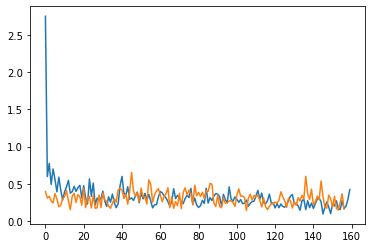

In [ ]:
model = NeuronMLP()
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss = nn.NLLLoss()

model.createMLP(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-37-533fc4d003bb>:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.batch_norm4(X))
<ipython-input-37-533fc4d003bb>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-37-533fc4d003bb>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_ans = Variable(torch.tensor(batch[1].cuda()))


              precision    recall  f1-score   support

           0     0.8750    0.8247    0.8491      1061
           1     0.9710    0.9928    0.9818       978
           2     0.8550    0.7961    0.8245      1074
           3     0.8850    0.8957    0.8903       988
           4     0.8550    0.7773    0.8143      1100
           5     0.9680    0.9641    0.9661      1004
           6     0.6400    0.7853    0.7052       815
           7     0.9490    0.9519    0.9504       997
           8     0.9660    0.9898    0.9777       976
           9     0.9650    0.9583    0.9616      1007

    accuracy                         0.8929     10000
   macro avg     0.8929    0.8936    0.8921     10000
weighted avg     0.8965    0.8929    0.8937     10000



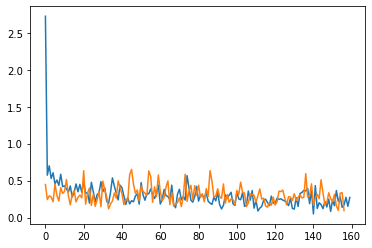

In [ ]:
model = NeuronMLP(28*28, 512, 512, 512, 10)
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss = nn.NLLLoss()

model.createMLP(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-37-533fc4d003bb>:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.batch_norm4(X))
<ipython-input-37-533fc4d003bb>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-37-533fc4d003bb>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_ans = Variable(torch.tensor(batch[1].cuda()))


              precision    recall  f1-score   support

           0     0.8500    0.8560    0.8530       993
           1     0.9750    0.9949    0.9848       980
           2     0.8770    0.7183    0.7897      1221
           3     0.9280    0.8855    0.9063      1048
           4     0.7450    0.8250    0.7830       903
           5     0.9710    0.9643    0.9676      1007
           6     0.6530    0.7792    0.7106       838
           7     0.9560    0.9484    0.9522      1008
           8     0.9700    0.9690    0.9695      1001
           9     0.9630    0.9620    0.9625      1001

    accuracy                         0.8888     10000
   macro avg     0.8888    0.8903    0.8879     10000
weighted avg     0.8939    0.8888    0.8897     10000



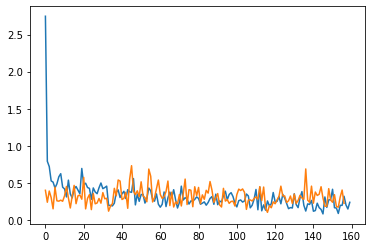

In [ ]:
model = NeuronMLP(28*28, 512, 512, 256, 10)
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss = nn.NLLLoss()

model.createMLP(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-37-533fc4d003bb>:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.batch_norm4(X))
<ipython-input-37-533fc4d003bb>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-37-533fc4d003bb>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_ans = Variable(torch.tensor(batch[1].cuda()))


              precision    recall  f1-score   support

           0     0.8250    0.8393    0.8321       983
           1     0.9710    0.9928    0.9818       978
           2     0.8260    0.8335    0.8297       991
           3     0.8990    0.8972    0.8981      1002
           4     0.8550    0.7909    0.8217      1081
           5     0.9500    0.9774    0.9635       972
           6     0.6810    0.7252    0.7024       939
           7     0.9720    0.9213    0.9460      1055
           8     0.9850    0.9666    0.9757      1019
           9     0.9470    0.9663    0.9566       980

    accuracy                         0.8911     10000
   macro avg     0.8911    0.8911    0.8908     10000
weighted avg     0.8924    0.8911    0.8914     10000



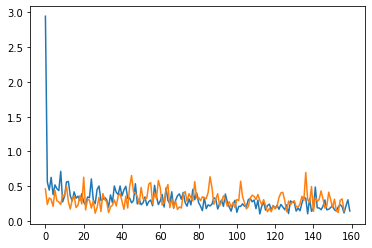

In [ ]:
model = NeuronMLP(28*28, 512, 256, 128, 10)
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss = nn.NLLLoss()

model.createMLP(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-37-533fc4d003bb>:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.batch_norm4(X))
<ipython-input-37-533fc4d003bb>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-37-533fc4d003bb>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_ans = Variable(torch.tensor(batch[1].cuda()))


              precision    recall  f1-score   support

           0     0.8680    0.8275    0.8472      1049
           1     0.9800    0.9849    0.9825       995
           2     0.7250    0.8756    0.7932       828
           3     0.8970    0.8997    0.8983       997
           4     0.8210    0.7902    0.8053      1039
           5     0.9370    0.9832    0.9595       953
           6     0.7280    0.6741    0.7000      1080
           7     0.9620    0.9331    0.9473      1031
           8     0.9760    0.9692    0.9726      1007
           9     0.9670    0.9471    0.9570      1021

    accuracy                         0.8861     10000
   macro avg     0.8861    0.8885    0.8863     10000
weighted avg     0.8874    0.8861    0.8859     10000



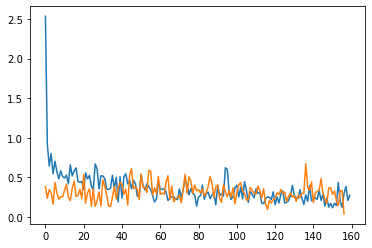

In [ ]:
model = NeuronMLP()
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.NLLLoss()

model.createMLP(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-37-533fc4d003bb>:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.batch_norm4(X))
<ipython-input-37-533fc4d003bb>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-37-533fc4d003bb>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_ans = Variable(torch.tensor(batch[1].cuda()))


              precision    recall  f1-score   support

           0     0.7890    0.8632    0.8245       914
           1     0.9800    0.9879    0.9839       992
           2     0.8580    0.8056    0.8310      1065
           3     0.9040    0.9113    0.9076       992
           4     0.7820    0.8737    0.8253       895
           5     0.9570    0.9696    0.9633       987
           6     0.7730    0.6865    0.7272      1126
           7     0.9600    0.9375    0.9486      1024
           8     0.9810    0.9713    0.9761      1010
           9     0.9610    0.9658    0.9634       995

    accuracy                         0.8945     10000
   macro avg     0.8945    0.8973    0.8951     10000
weighted avg     0.8949    0.8945    0.8939     10000



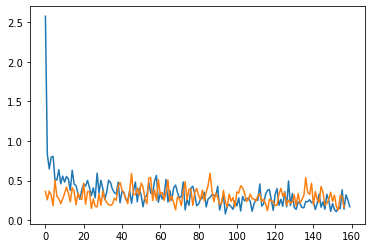

In [ ]:
model = NeuronMLP(28*28, 512, 512, 512, 10)
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.NLLLoss()

model.createMLP(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-37-533fc4d003bb>:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.batch_norm4(X))
<ipython-input-37-533fc4d003bb>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-37-533fc4d003bb>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_ans = Variable(torch.tensor(batch[1].cuda()))


              precision    recall  f1-score   support

           0     0.8370    0.8532    0.8450       981
           1     0.9800    0.9929    0.9864       987
           2     0.8140    0.8059    0.8100      1010
           3     0.9110    0.9047    0.9078      1007
           4     0.7710    0.8529    0.8099       904
           5     0.9660    0.9857    0.9758       980
           6     0.7700    0.6924    0.7292      1112
           7     0.9540    0.9464    0.9502      1008
           8     0.9750    0.9799    0.9774       995
           9     0.9660    0.9508    0.9583      1016

    accuracy                         0.8944     10000
   macro avg     0.8944    0.8965    0.8950     10000
weighted avg     0.8941    0.8944    0.8938     10000



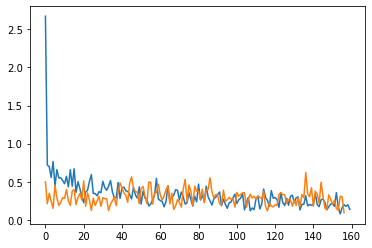

In [ ]:
model = NeuronMLP(28*28, 512, 512, 256, 10)
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.NLLLoss()

model.createMLP(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-37-533fc4d003bb>:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.batch_norm4(X))
<ipython-input-37-533fc4d003bb>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-37-533fc4d003bb>:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_ans = Variable(torch.tensor(batch[1].cuda()))


              precision    recall  f1-score   support

           0     0.8680    0.8338    0.8506      1041
           1     0.9800    0.9849    0.9825       995
           2     0.7960    0.8335    0.8143       955
           3     0.9330    0.8761    0.9036      1065
           4     0.8550    0.7815    0.8166      1094
           5     0.9520    0.9804    0.9660       971
           6     0.6560    0.7681    0.7077       854
           7     0.9630    0.9423    0.9525      1022
           8     0.9750    0.9858    0.9804       989
           9     0.9690    0.9556    0.9623      1014

    accuracy                         0.8947     10000
   macro avg     0.8947    0.8942    0.8936     10000
weighted avg     0.8984    0.8947    0.8958     10000



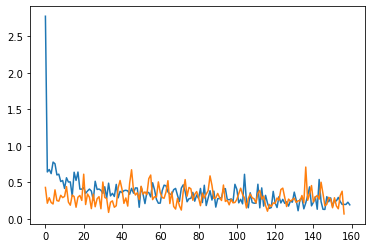

In [ ]:
model = NeuronMLP(28*28, 512, 256, 128, 10)
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.NLLLoss()

model.createMLP(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

Модели хорошо себя показали (показания метрик около 0.9). Для SVG лучше ставить более быстрый lr, а лучший набор входных/выходных параметров для слоев: [784, 512, 512, 512 10]. Для Adam - [784, 512, 512, 512, 10] - чуть выше 0.89, [784, 512, 512, 256, 10] и [784, 512, 256, 128, 10] - 0.89 (почти 0.9).

Данные параметры подбирались от значений для работы с пикселями (из практики по Нейроным сетям).
Применение log_softmax с NLLLoss эквивалентно cross_entropy, что лучше использовать для многоклассовой классификации.

Лучшие показатели метрик в общем с Adam - 0.89-0.9.

### CNN

In [ ]:
class NeuronCNN(torch.nn.Module):
  def __init__(self, input_size=2304, layer2=128, layer3=128, output_size=10):
    super(NeuronCNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
    self.conv_norm1 = nn.BatchNorm2d(32)

    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
    self.conv_norm2 = nn.BatchNorm2d(64)

    self.pool2 = nn.MaxPool2d(kernel_size=2)

    self.drop = nn.Dropout2d(0.25)

    self.linear1 = nn.Linear(input_size, layer2)
    self.linear_norm1 = nn.BatchNorm1d(layer2)

    self.linear2 = nn.Linear(layer2, layer3)
    self.linear_norm2 = nn.BatchNorm1d(layer3)

    self.linear3 = nn.Linear(layer3, output_size)
    self.linear_norm3 = nn.BatchNorm1d(output_size)

  def forward(self, X):
    X = self.conv1(X)
    X = self.pool1(F.relu(self.conv_norm1(X)))

    X = self.conv2(X)
    X = self.pool2(F.relu(self.conv_norm2(X)))

    X = X.view(-1, 64*6*6)

    X = self.linear1(X)
    X = F.relu(self.linear_norm1(X))

    X = self.linear2(X)
    X = F.relu(self.linear_norm2(X))

    X = self.drop(X)

    X = self.linear3(X)
    X = F.log_softmax(self.linear_norm3(X))
    return X

  def createCNN(self, optimizer, loss):
    self.optimizer = optimizer
    self.loss = loss

  def fit(self, train_loader, epochs):
    loss_values = []
    for epoch in tqdm(range(epochs)):
      for batch_indx, (data, targets) in enumerate(train_loader):
        data, targets = Variable(data.cuda()), Variable(targets.cuda())
        self.optimizer.zero_grad()
        net_out = self(data)
        loss = self.loss(net_out, targets)
        loss.backward()
        self.optimizer.step()
        if (batch_indx % 60 == 0):
          loss_values.append(loss.detach().cpu().item())
    return loss_values

  def report(self, testloader):
    self.eval()
    y_trues = list()
    y_hats = list()
    loss_values = []
    with torch.no_grad():
      for batch in testloader:
        data = batch[0]
        y_pred = self(data.cuda())
        y_hat = torch.argmax(y_pred, dim=1).detach().cpu()
        y_trues.extend(batch[1])
        y_hats.extend(y_hat)
        ans = Variable(torch.tensor(y_pred.cuda()))
        true_ans = Variable(torch.tensor(batch[1].cuda()))
        loss = self.loss(ans, true_ans)
        loss_values.append(loss.detach().cpu().item())
    print(classification_report(y_hats, y_trues, digits=4))
    return loss_values

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.8000    0.9091    0.8511       880
           1     0.9760    0.9959    0.9859       980
           2     0.8160    0.9169    0.8635       890
           3     0.9590    0.8734    0.9142      1098
           4     0.8870    0.8297    0.8574      1069
           5     0.9680    0.9908    0.9793       977
           6     0.7950    0.7354    0.7641      1081
           7     0.9880    0.9277    0.9569      1065
           8     0.9800    0.9829    0.9815       997
           9     0.9490    0.9855    0.9669       963

    accuracy                         0.9118     10000
   macro avg     0.9118    0.9147    0.9121     10000
weighted avg     0.9136    0.9118    0.9115     10000



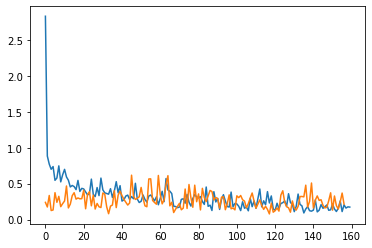

In [ ]:
model = NeuronCNN()
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.8340    0.9046    0.8678       922
           1     0.9920    0.9920    0.9920      1000
           2     0.8540    0.8952    0.8741       954
           3     0.9150    0.9150    0.9150      1000
           4     0.9000    0.8499    0.8742      1059
           5     0.9880    0.9880    0.9880      1000
           6     0.7910    0.7469    0.7683      1059
           7     0.9750    0.9634    0.9692      1012
           8     0.9820    0.9820    0.9820      1000
           9     0.9680    0.9738    0.9709       994

    accuracy                         0.9199     10000
   macro avg     0.9199    0.9211    0.9202     10000
weighted avg     0.9200    0.9199    0.9196     10000



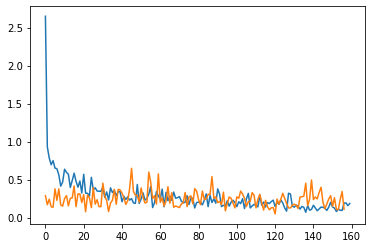

In [ ]:
model = NeuronCNN(64*6*6, 512, 512, 10)
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.7380    0.9191    0.8186       803
           1     0.9790    0.9929    0.9859       986
           2     0.3340    0.9330    0.4919       358
           3     0.9350    0.8657    0.8990      1080
           4     0.8910    0.6791    0.7708      1312
           5     0.9990    0.8976    0.9456      1113
           6     0.8480    0.5745    0.6850      1476
           7     0.8970    0.9462    0.9209       948
           8     0.9600    0.9877    0.9736       972
           9     0.9380    0.9853    0.9611       952

    accuracy                         0.8519     10000
   macro avg     0.8519    0.8781    0.8452     10000
weighted avg     0.8896    0.8519    0.8586     10000



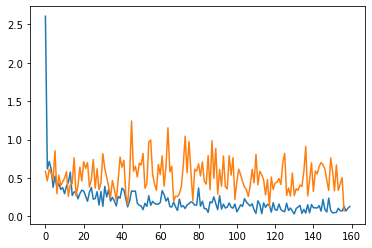

In [ ]:
model = NeuronCNN(64*6*6, 512, 256, 10)
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.8180    0.9069    0.8601       902
           1     0.9840    0.9980    0.9909       986
           2     0.8860    0.8790    0.8825      1008
           3     0.9450    0.9130    0.9287      1035
           4     0.8610    0.8913    0.8759       966
           5     0.9920    0.9851    0.9885      1007
           6     0.8180    0.7450    0.7798      1098
           7     0.9730    0.9672    0.9701      1006
           8     0.9900    0.9861    0.9880      1004
           9     0.9680    0.9798    0.9738       988

    accuracy                         0.9235     10000
   macro avg     0.9235    0.9251    0.9238     10000
weighted avg     0.9237    0.9235    0.9232     10000



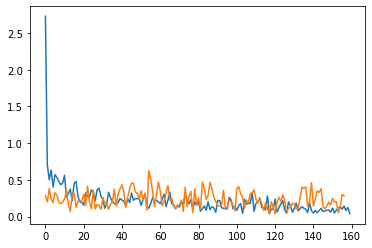

In [ ]:
model = NeuronCNN(64*6*6, 512, 128, 10)
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.8760    0.8673    0.8716      1010
           1     0.9890    0.9960    0.9925       993
           2     0.8730    0.8509    0.8618      1026
           3     0.9280    0.9289    0.9285       999
           4     0.8690    0.8707    0.8699       998
           5     0.9810    0.9840    0.9825       997
           6     0.7500    0.7478    0.7489      1003
           7     0.9480    0.9713    0.9595       976
           8     0.9570    0.9886    0.9726       968
           9     0.9810    0.9524    0.9665      1030

    accuracy                         0.9152     10000
   macro avg     0.9152    0.9158    0.9154     10000
weighted avg     0.9149    0.9152    0.9150     10000



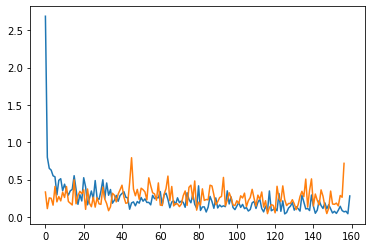

In [ ]:
model = NeuronCNN(64*6*6, 512, 64, 10)
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.7080    0.9219    0.8009       768
           1     0.9770    0.9980    0.9874       979
           2     0.5640    0.9511    0.7081       593
           3     0.9380    0.8750    0.9054      1072
           4     0.7170    0.8863    0.7927       809
           5     0.9820    0.9781    0.9800      1004
           6     0.8960    0.4972    0.6395      1802
           7     0.9830    0.9416    0.9618      1044
           8     0.9640    0.9938    0.9787       970
           9     0.9460    0.9864    0.9658       959

    accuracy                         0.8675     10000
   macro avg     0.8675    0.9029    0.8720     10000
weighted avg     0.8889    0.8675    0.8630     10000



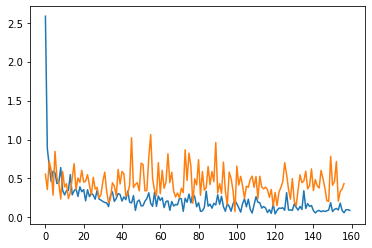

In [ ]:
model = NeuronCNN(64*6*6, 256, 128, 10)
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.8570    0.8835    0.8701       970
           1     0.9800    0.9959    0.9879       984
           2     0.8300    0.9161    0.8709       906
           3     0.9510    0.8963    0.9229      1061
           4     0.9000    0.8515    0.8751      1057
           5     0.9820    0.9859    0.9840       996
           6     0.7800    0.7632    0.7715      1022
           7     0.9620    0.9727    0.9673       989
           8     0.9840    0.9889    0.9865       995
           9     0.9810    0.9618    0.9713      1020

    accuracy                         0.9207     10000
   macro avg     0.9207    0.9216    0.9207     10000
weighted avg     0.9214    0.9207    0.9207     10000



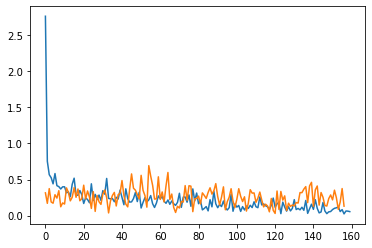

In [ ]:
model = NeuronCNN()
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.8890    0.8532    0.8707      1042
           1     0.9880    0.9950    0.9915       993
           2     0.8640    0.9019    0.8825       958
           3     0.9260    0.9411    0.9335       984
           4     0.9460    0.8284    0.8833      1142
           5     0.9890    0.9841    0.9865      1005
           6     0.7320    0.8253    0.7758       887
           7     0.9860    0.9508    0.9681      1037
           8     0.9850    0.9939    0.9895       991
           9     0.9480    0.9865    0.9669       961

    accuracy                         0.9253     10000
   macro avg     0.9253    0.9260    0.9248     10000
weighted avg     0.9280    0.9253    0.9258     10000



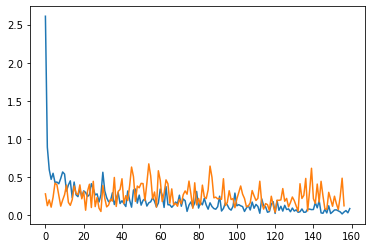

In [ ]:
model = NeuronCNN(64*6*6, 512, 512, 10)
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.9000    0.8459    0.8721      1064
           1     0.9830    0.9860    0.9845       997
           2     0.9100    0.8521    0.8801      1068
           3     0.8860    0.9446    0.9143       938
           4     0.8870    0.8587    0.8726      1033
           5     0.9830    0.9909    0.9869       992
           6     0.7360    0.8115    0.7719       907
           7     0.9830    0.9562    0.9694      1028
           8     0.9800    0.9919    0.9859       988
           9     0.9640    0.9787    0.9713       985

    accuracy                         0.9212     10000
   macro avg     0.9212    0.9216    0.9209     10000
weighted avg     0.9228    0.9212    0.9215     10000



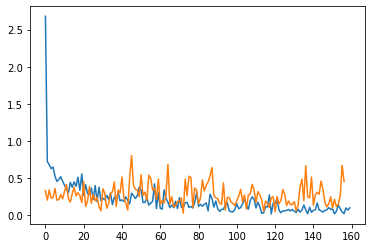

In [ ]:
model = NeuronCNN(64*6*6, 512, 256, 10)
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.8390    0.8916    0.8645       941
           1     0.9840    0.9909    0.9875       993
           2     0.9070    0.8806    0.8936      1030
           3     0.9410    0.9154    0.9280      1028
           4     0.8760    0.9116    0.8934       961
           5     0.9910    0.9871    0.9890      1004
           6     0.8030    0.7773    0.7900      1033
           7     0.9790    0.9800    0.9795       999
           8     0.9900    0.9792    0.9846      1011
           9     0.9780    0.9780    0.9780      1000

    accuracy                         0.9288     10000
   macro avg     0.9288    0.9292    0.9288     10000
weighted avg     0.9291    0.9288    0.9288     10000



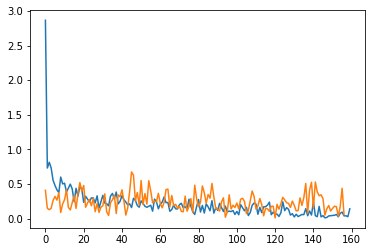

In [ ]:
model = NeuronCNN(64*6*6, 512, 128, 10)
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.8860    0.8833    0.8847      1003
           1     0.9870    0.9960    0.9915       991
           2     0.8690    0.8922    0.8804       974
           3     0.9410    0.9101    0.9253      1034
           4     0.9160    0.8513    0.8825      1076
           5     0.9850    0.9899    0.9875       995
           6     0.7510    0.8128    0.7807       924
           7     0.9770    0.9654    0.9712      1012
           8     0.9840    0.9919    0.9880       992
           9     0.9760    0.9770    0.9765       999

    accuracy                         0.9272     10000
   macro avg     0.9272    0.9270    0.9268     10000
weighted avg     0.9286    0.9272    0.9276     10000



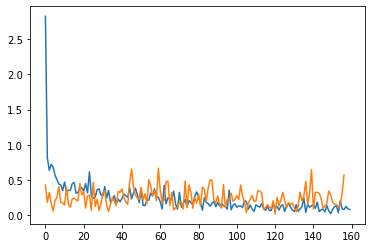

In [ ]:
model = NeuronCNN(64*6*6, 512, 64, 10)
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.8750    0.8821    0.8785       992
           1     0.9790    1.0000    0.9894       979
           2     0.8990    0.8636    0.8809      1041
           3     0.9200    0.9312    0.9256       988
           4     0.8670    0.8975    0.8820       966
           5     0.9860    0.9870    0.9865       999
           6     0.7990    0.7727    0.7856      1034
           7     0.9830    0.9590    0.9709      1025
           8     0.9830    0.9889    0.9860       994
           9     0.9660    0.9837    0.9748       982

    accuracy                         0.9257     10000
   macro avg     0.9257    0.9266    0.9260     10000
weighted avg     0.9253    0.9257    0.9254     10000



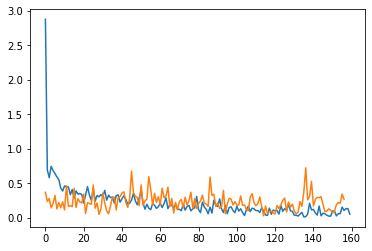

In [ ]:
model = NeuronCNN(64*6*6, 256, 128, 10)
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=10)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

С аналогичными параметрами для слоев сверточная сеть показала более высокие значения метрик. Все также - для SGD лучшие значения входных/выходных значений для слоев - [2304, 512, 128, 10] - больше 0.92. Для Adam - [2304,512,128,10], [2304,512,128,10] - 92,8-92,9 (близко к 0.93).
Лучшие показатели в общем у Adam - 0.93.
А модель, обучающая лучше при одинаковых параметрах - модель сверточной сети.

**Попробуем увеличить количество эпох:**

  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.9270    0.7883    0.8520      1176
           1     0.9890    0.9900    0.9895       999
           2     0.9080    0.8307    0.8677      1093
           3     0.9290    0.9002    0.9144      1032
           4     0.8490    0.8646    0.8567       982
           5     0.9800    0.9859    0.9829       994
           6     0.6180    0.8692    0.7224       711
           7     0.9780    0.9504    0.9640      1029
           8     0.9860    0.9811    0.9835      1005
           9     0.9610    0.9816    0.9712       979

    accuracy                         0.9125     10000
   macro avg     0.9125    0.9142    0.9104     10000
weighted avg     0.9215    0.9125    0.9146     10000



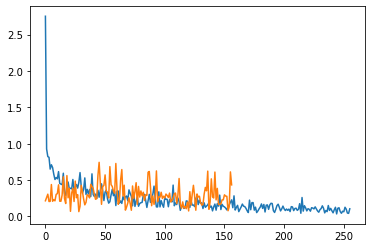

In [ ]:
model = NeuronCNN(64*6*6, 512, 128, 10)
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=16)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
<ipython-input-54-a7ad39fb2ce5>:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  X = F.log_softmax(self.linear_norm3(X))
<ipython-input-54-a7ad39fb2ce5>:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = Variable(torch.tensor(y_pred.cuda()))
<ipython-input-54-a7ad39fb2ce5>:77: UserWarning

              precision    recall  f1-score   support

           0     0.8450    0.8914    0.8676       948
           1     0.9850    0.9899    0.9875       995
           2     0.8600    0.9120    0.8852       943
           3     0.9310    0.9127    0.9218      1020
           4     0.8590    0.8967    0.8774       958
           5     0.9830    0.9889    0.9860       994
           6     0.8420    0.7367    0.7858      1143
           7     0.9800    0.9570    0.9684      1024
           8     0.9810    0.9909    0.9859       990
           9     0.9660    0.9807    0.9733       985

    accuracy                         0.9232     10000
   macro avg     0.9232    0.9257    0.9239     10000
weighted avg     0.9230    0.9232    0.9225     10000



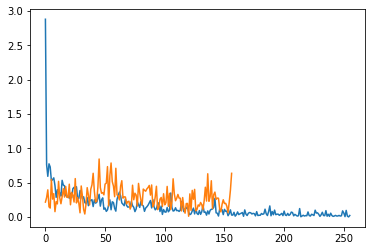

In [ ]:
model = NeuronCNN(64*6*6, 512, 128, 10)
model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.NLLLoss()

model.createCNN(loss=loss, optimizer=optimizer)
loss_values = model.fit(train_loader=trainloader, epochs=16)
loss_test = model.report(testloader=testloader)
plt.plot(loss_values)
plt.plot(loss_test)
plt.show()

Улучшений работы не видно, даже становится хуже.